In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
#Data Reading 
#Data Dimension
data_leads= pd.read_csv("Leads.csv", header=0)
print(data_leads.shape)
data_leads.head()

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
##Data Type Check
data_leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
data_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
##Missing Values - Find percentange of missing value of each column 

null_data_leads= data_leads.isnull().sum()
perc_null_data_leads= null_data_leads/ len(data_leads)*100
null_data_leads_DF= pd.DataFrame(perc_null_data_leads).reset_index()
null_data_leads_DF.columns=["Column Name","% of Missing Values"]
null_data_leads_DF

,Column Name,% of Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Do Not Call,0.000000
6,Converted,0.000000
7,TotalVisits,1.482684
8,Total Time Spent on Website,0.000000
9,Page Views Per Visit,1.482684


In [6]:
#Find columns with more than 15% missing values
null_15_perc_data_leads= null_data_leads_DF[null_data_leads_DF["% of Missing Values"]>=15]
null_15_perc_data_leads

,Column Name,% of Missing Values
11,Country,26.634199
12,Specialization,15.562771
13,How did you hear about X Education,23.885281
14,What is your current occupation,29.112554
15,What matters most to you in choosing a course,29.318182
24,Tags,36.287879
25,Lead Quality,51.590909
28,Lead Profile,29.318182
29,City,15.367965
30,Asymmetrique Activity Index,45.649351


In [7]:
##Check NaN columns and impute values where applicable 
#Country
data_leads['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [22]:
##Impute NaN with India
data_leads['Country']= data_leads['Country'].replace(np.nan, 'India')
data_leads['Country'].value_counts(dropna=False)
## Most of the data is India, so the column Country will not help during analysis so column Country can be dropped. 

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [9]:
##Check NaN columns and impute values where applicable 
#City
data_leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [10]:
##There are 'Select' values, so we can convert to NaN, then convert NaN to Mumbai
data_leads= data_leads.replace('Select', np.nan)
data_leads['City']= data_leads['City'].replace(np.nan, 'Mumbai')
data_leads['City'].value_counts(dropna=False)
##Most of the data is Mumbai, so the column City will not help during analysis so column City can be dropped. 

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [11]:
##Check NaN columns and impute values where applicable 
#Specialization
data_leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [12]:
##Impute the NaN as 'Not Specified'
data_leads['Specialization'] = data_leads['Specialization'].replace(np.nan, 'Not Specified')
data_leads['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [13]:
##Combine the management to 1 group
data_leads['Specialization'] = data_leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management Specialization')  
data_leads['Specialization'].value_counts(dropna=False)

Management Specialization            4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [14]:
##Check NaN columns and impute values where applicable 
#What is your current occupation
data_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [15]:
data_leads['What is your current occupation'] = data_leads['What is your current occupation'].replace(np.nan,'Unemployed')
data_leads['What is your current occupation'].value_counts(dropna=False)
##Unemployed make up almost of the column data; so we can drop this column

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [16]:
##Check NaN columns and impute values where applicable 
#What matters most to you in choosing a course
data_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
data_leads['What matters most to you in choosing a course'] = data_leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
data_leads['What matters most to you in choosing a course'].value_counts(dropna=False)
##Better Career Prospects make up almost of the column data; so we can drop this column

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
##Check NaN columns and impute values where applicable 
#Tags
data_leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [19]:
data_leads['Tags'] = data_leads['Tags'].replace(np.nan,'Not Specified')
data_leads['Tags'] = data_leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'wrong number given','invalid number','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other Tags')

data_leads['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Other Tags                              413
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Name: Tags, dtype: int64

In [23]:

null_data_leads= data_leads.isnull().sum()
perc_null_data_leads= null_data_leads/ len(data_leads)*100
null_data_leads_DF= pd.DataFrame(perc_null_data_leads).reset_index()
null_data_leads_DF.columns=["Column Name","% of Missing Values"]
null_data_leads_DF

,Column Name,% of Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Do Not Call,0.000000
6,Converted,0.000000
7,TotalVisits,1.482684
8,Total Time Spent on Website,0.000000
9,Page Views Per Visit,1.482684


In [26]:
Unnecessary_columns=['Country', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'What matters most to you in choosing a course','Prospect ID','Lead Number','Lead Quality','Lead Profile','How did you hear about X Education'] 

In [25]:
##Check NaN columns and impute values where applicable 
data_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
data_leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [28]:
data_leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [30]:
data_leads['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [31]:
data_leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [32]:
data_leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [33]:
data_leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [34]:
data_leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [35]:
data_leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [36]:
data_leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [37]:
data_leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [38]:
data_leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [39]:
data_leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [40]:
data_leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [41]:
data_leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [42]:
data_leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [47]:
data_leads['Last Notable Activity']= data_leads['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam','Unreachable','Unsubscribed', 'Email Bounced','Resubscribed to emails',
                                                                       'View in browser link Clicked','Approached upfront', 'Form Submitted on Website', 'Email Received'],'Other Last Notable Activity')

data_leads['Last Notable Activity'].value_counts()

Modified                       3407
Email Opened                   2827
SMS Sent                       2172
Page Visited on Website         318
Olark Chat Conversation         183
Email Link Clicked              173
Other Last Notable Activity     160
Name: Last Notable Activity, dtype: int64

In [44]:
Unnecessary_columns= Unnecessary_columns + ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque']
Unnecessary_columns

['Country',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Lead Quality',
 'Lead Profile',
 'How did you hear about X Education',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [64]:
##Removed Unnessary Columns
data_leads = data_leads.drop(Unnecessary_columns,1,inplace=True)
data_leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

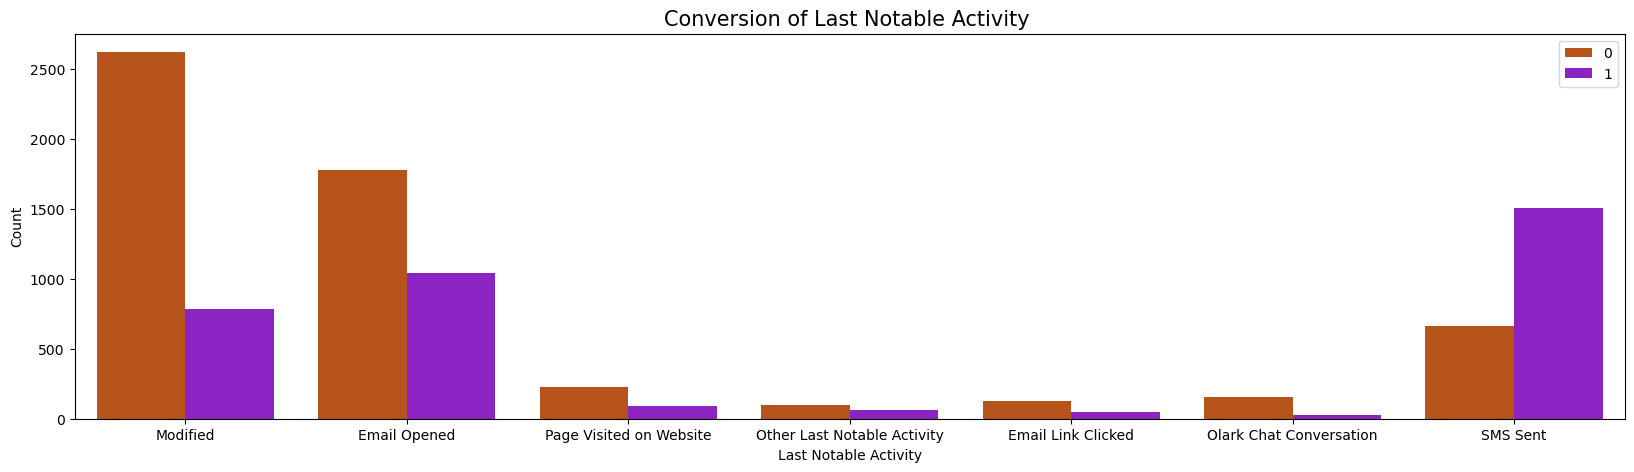

In [66]:
##Plot Converted 'Last Notable Activity'
plt.figure(figsize=(20,5))
count_fig=sns.countplot(data_leads['Last Notable Activity'], hue=data_leads['Converted'],palette='gnuplot_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)
plt.title("Conversion of Last Notable Activity ",fontsize=15)
plt.xlabel("Last Notable Activity", fontsize=10)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=10)
plt.show()

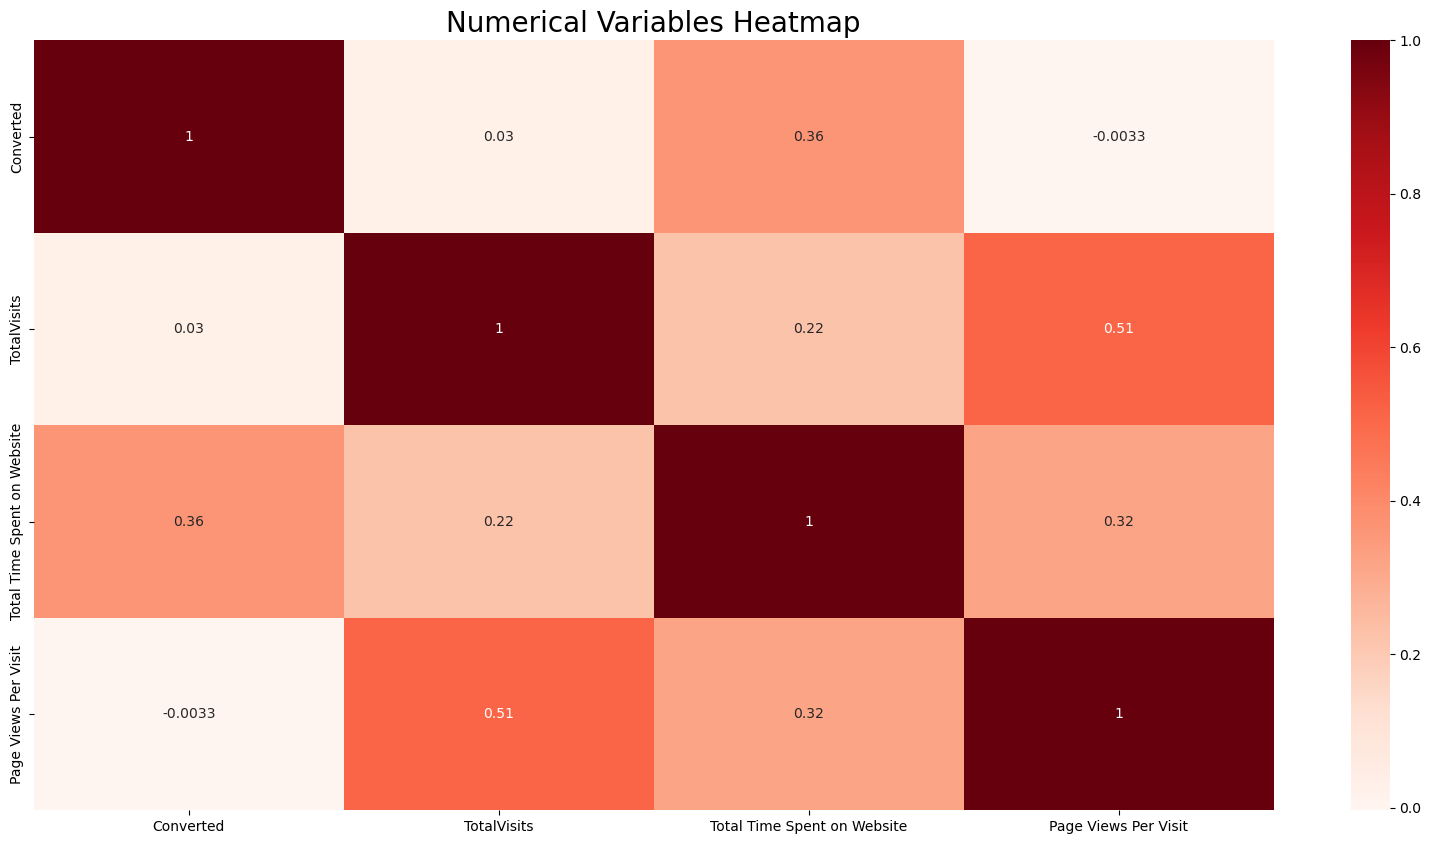

In [70]:
##Plot heatmap

plt.figure(figsize=(20,10))
sns.heatmap(data_leads.corr(), cmap="Reds", annot=True)
plt.title("Numerical Variables Heatmap",fontsize=20)
plt.show()

In [72]:
data_leads['Total Time Spent on Website'].value_counts()

0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [91]:
##Dummy variables

categorical_vals= data_leads.select_dtypes(include=['object']).columns
categorical_vals

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [95]:
##Adding Dummy Variables to 'Lead Origin'
dummy = pd.get_dummies(data_leads[['Lead Origin','What is your current occupation','City']], drop_first=True)
data_leads = pd.concat([data_leads,dummy],1)

In [102]:
##Adding Dummy Variables to Specialization, Lead Source, Last Activity, Last Notable Activity, Tags

dummy = pd.get_dummies(data_leads['Specialization'], prefix  = 'Specialization')
data_leads = pd.concat([data_leads, dummy], axis = 1)

dummy = pd.get_dummies(data_leads['Lead Source'], prefix  = 'Lead Source')
data_leads = pd.concat([data_leads, dummy], axis = 1)

dummy = pd.get_dummies(data_leads['Last Activity'], prefix  = 'Last Activity')
data_leads = pd.concat([data_leads, dummy], axis = 1)

dummy = pd.get_dummies(data_leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
data_leads= pd.concat([data_leads, dummy], axis = 1)

dummy = pd.get_dummies(data_leads['Tags'], prefix  = 'Tags')
data_leads= pd.concat([data_leads, dummy], axis = 1)


In [ ]:
data_leads.drop(categorical_vals,1,inplace = True)

In [103]:
data_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,1,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,0,0,0,0,0,0,0,0,1,0


In [74]:
##Train-Test Split 

from sklearn.model_selection import train_test_split

y = data_leads['Converted']
y.head()

X=data_leads.drop('Converted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6468 non-null   object 
 1   Lead Source                             6441 non-null   object 
 2   Do Not Email                            6468 non-null   object 
 3   Do Not Call                             6468 non-null   object 
 4   TotalVisits                             6369 non-null   float64
 5   Total Time Spent on Website             6468 non-null   int64  
 6   Page Views Per Visit                    6369 non-null   float64
 7   Last Activity                           6394 non-null   object 
 8   Specialization                          6468 non-null   object 
 9   What is your current occupation         6468 non-null   object 
 10  Tags                                    6468 non-null   o

In [104]:
##Scaling of Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_columns=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
1871,API,Olark Chat,No,No,-0.652796,-0.885371,-1.079876,Email Opened,Management Specialization,Unemployed,Ringing,Mumbai,No,Email Opened
6795,Landing Page Submission,Direct Traffic,No,No,0.098633,0.005716,-0.469529,Email Opened,Not Specified,Unemployed,Not Specified,Other Cities,Yes,Email Opened
3516,API,Olark Chat,No,No,0.286490,-0.691418,0.067394,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
8105,Landing Page Submission,Google,No,No,0.286490,1.365219,1.214664,SMS Sent,Services Excellence,Unemployed,Ringing,Mumbai,No,SMS Sent
3934,API,Olark Chat,No,No,-0.652796,-0.885371,-1.079876,Email Opened,Not Specified,Unemployed,Not Specified,Mumbai,No,Modified


In [115]:
##Building Logistic Regression with Stats Model

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe= RFE(logreg)       
rfe= rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'API'